 ## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns



from pandasql import sqldf

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Reading the datasets

In [2]:
df1 = pd.read_csv("Table S1.csv", skiprows=1, header = 0)
df2 = pd.read_csv("Table S2.csv", skiprows=1, header = 0)
df3 = pd.read_csv("Table S3.csv", skiprows=1, header = 0)

In [3]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(2988, 28)
(418, 24)
(52, 25)


### Checking for class imbalance

In [4]:
df1['Comment'].value_counts()

Barren       1687
Fertility    1301
Name: Comment, dtype: int64

In [5]:
# sampling the data
df1.sample(3)

,CITATION,LOCATION,LATITUDE (MIN.),LONGITUDE (MIN.),ROCK NAME,AGE(MA),Cu_tonnage_Mt,Comment,Feature,Ti,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
965,[22243] LIU LIANG (2018),CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...,29.45,121.1419,"GRANITE, ALKALIFELDSPAR",122.207422,NaN,Barren,0,9.608191,...,291.749904,132.809551,727.148712,181.604846,1871.892571,369.639054,4837.930074,12695.94087,5507.939393,3407.057886
1896,Rohrlach 2002; Lu et al. 2016,Tampakan,NaN,NaN,R05044A_41,3.800000,7.7,Fertility,1,6.800000,...,26.700000,11.140000,61.700000,13.560000,154.200000,36.000000,372.000000,7729.00000,45.100000,32.400000
1460,[22874] LU LU (2019),CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...,32.80,92.0000,GRANITE,239.000000,NaN,Barren,0,254.170000,...,179.820000,66.500000,284.970000,57.170000,512.930000,89.460000,1940.200000,9346.77000,771.650000,496.750000


In [6]:
# Prints the columns present in the dataframe
df1.columns

Index(['CITATION', 'LOCATION', 'LATITUDE (MIN.)', 'LONGITUDE (MIN.)',
       'ROCK NAME', 'AGE(MA)', 'Cu_tonnage_Mt', 'Comment', 'Feature', 'Ti',
       'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm',
       'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th'],
      dtype='object')

In [7]:
df2.columns

Index(['Sample No.', 'Rock type', 'Zricon ID', 'Age', 'Ti', 'Ce', 'Nd', 'Sm',
       'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf',
       'Ce_zhong', 'Eu_zhong', 'Eu_Zhong/Y', 'Ce/Nd', '(Ce/Nd)/Y'],
      dtype='object')

In [8]:
df2.sample(3)

,Sample No.,Rock type,Zricon ID,Age,Ti,Ce,Nd,Sm,Eu,Gd,...,Tm,Yb,Lu,Y,Hf,Ce_zhong,Eu_zhong,Eu_Zhong/Y,Ce/Nd,(Ce/Nd)/Y
296,MA026,Chataway sub-facies,RLP1L5-10B,210.51,5.50,7.05,0.41,0.86,0.295,4.89,...,11.93,125.5,29.62,318.8,9060,798.718832,0.356573,0.001118,17.195122,0.053937
346,SM061,Salt & pepper Bethsaida,RLP1L7-17,208.15,1.31,26.40,0.45,1.98,0.490,18.00,...,62.60,608.0,131.70,1680.0,10988,4511.742793,0.218134,0.000130,58.666667,0.034921
213,SM058,Bethlehem facies,RLP1L2-9A,209.17,7.00,10.01,2.30,4.36,1.480,19.70,...,26.10,245.0,51.90,767.0,9370,89.178085,0.446272,0.000582,4.352174,0.005674


In [9]:
df3.columns

Index(['Sample', 'Analysis number', 'Location', 'Age (Ma)', 'Ti', 'Ce', 'Pr',
       'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y',
       'Hf', 'Ce_zhong', 'Eu_zhong', 'Eu_Zhong/Y', 'Ce/Nd', '(Ce/Nd)/Y'],
      dtype='object')

In [10]:
df3.sample(3)

,Sample,Analysis number,Location,Age (Ma),Ti,Ce,Pr,Nd,Sm,Eu,...,Tm,Yb,Lu,Y,Hf,Ce_zhong,Eu_zhong,Eu_Zhong/Y,Ce/Nd,(Ce/Nd)/Y
36,PZ11-03,PZ11-03_11,Xigaze,17,7.335957,9.173,0.0432,1.4310,3.168,2.015,...,22.37,235.8,43.02,739.8,7302.812352,147.069446,0.778810,0.001053,6.410203,0.008665
33,PZ11-03,PZ11-03_6,Xigaze,17,10.272737,12.690,0.0476,1.6700,3.653,2.541,...,38.15,382.5,64.16,1217.0,9570.313539,201.214338,0.708490,0.000582,7.598802,0.006244
20,JM11-36,JM11-36_4,Jiama,17,2.516041,26.380,0.0809,0.9649,1.987,1.137,...,41.79,524.2,120.30,878.7,12490.760100,2003.245569,0.525509,0.000598,27.339621,0.031114


### Analysing the column Sample No in dataframes 2 and 3.

In [11]:
df2['Sample No.'].value_counts()

MA026    57
SM060    46
SM061    39
MA121    30
SM056    29
SB123    28
SM057    27
SM058    25
MA038    23
SB217    23
MA099    22
SB218    21
SM055    20
SM059    18
KB132    10
Name: Sample No., dtype: int64

In [12]:
df3['Sample'].value_counts()

PZ11-03     9
PG11-03     6
NM11-01     5
WR-12-11    5
KMQ-12-2    5
JM11-36     5
PG11-06     5
JR11-06     4
QS-11       3
JR-2        3
JR-5        2
Name: Sample, dtype: int64

### Working with dataframe 1

In [13]:
# Print the first 5 rows of the dataframe
df1.head()

,CITATION,LOCATION,LATITUDE (MIN.),LONGITUDE (MIN.),ROCK NAME,AGE(MA),Cu_tonnage_Mt,Comment,Feature,Ti,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
0,[19221] ZHAO SHAO-QING (2015),CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...,33.0,95.0,DACITE,222.0,NaN,Barren,0,7.88,...,295.0,125.0,526.0,129.0,1077.0,199.0,2737.0,12390.0,305.0,134.0
1,[19221] ZHAO SHAO-QING (2015),CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...,33.0,95.0,DACITE,222.0,NaN,Barren,0,10.90,...,361.0,147.0,611.0,148.0,1232.0,228.0,3226.0,12591.0,503.0,272.0
2,[19221] ZHAO SHAO-QING (2015),CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...,33.0,95.0,DACITE,222.0,NaN,Barren,0,6.00,...,415.0,172.0,701.0,167.0,1358.0,248.0,3675.0,12724.0,639.0,414.0
3,[19221] ZHAO SHAO-QING (2015),CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...,33.0,95.0,DACITE,222.0,NaN,Barren,0,9.06,...,194.0,83.0,356.0,89.5,762.0,144.0,1832.0,12894.0,308.0,127.0
4,[19221] ZHAO SHAO-QING (2015),CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...,33.0,95.0,DACITE,222.0,NaN,Barren,0,4.93,...,257.0,108.0,456.0,111.0,936.0,171.0,2355.0,12535.0,348.0,155.0


In [14]:
### Number of Cu deposits based on location

In [15]:
group_by_loc = sqldf("""
                        SELECT LOCATION AS location, COUNT(*) AS num_deposits
                        FROM df1
                        GROUP BY LOCATION
                        ORDER BY LOCATION

                     """)

In [16]:
group_by_loc

,location,num_deposits
0,ALEUTIAN ARC / CENTRAL ALEUTIAN ARC / ADAK / H...,11
1,Aktogai,8
2,BALTIC SHIELD - PROTEROZOIC / SVECOFENNIAN PRO...,168
3,Baogutu,6
4,Batu Hijau,63
...,...,...
59,Tuwu-Yandong,29
60,YANGTZE BLOCK / YANGTZE BLOCK_SOUTHERN SEGMENT...,107
61,Yellowstone,18
62,Younger Toba Tuff,20


### Null Values

In [17]:
df1.isnull().sum().sort_values(ascending=False)

Cu_tonnage_Mt       1687
LATITUDE (MIN.)     1522
LONGITUDE (MIN.)    1522
La                   923
Pr                   256
Ti                   255
ROCK NAME            124
AGE(MA)              124
Nd                    93
Er                    79
Tm                    78
Y                     74
Hf                    25
Eu                    15
Sm                     8
Gd                     6
Ce                     5
Dy                     3
Lu                     2
Tb                     1
Ho                     1
Yb                     1
U                      0
CITATION               0
LOCATION               0
Feature                0
Comment                0
Th                     0
dtype: int64

<Axes: title={'center': 'Heatmap of missing values in the dataset'}>

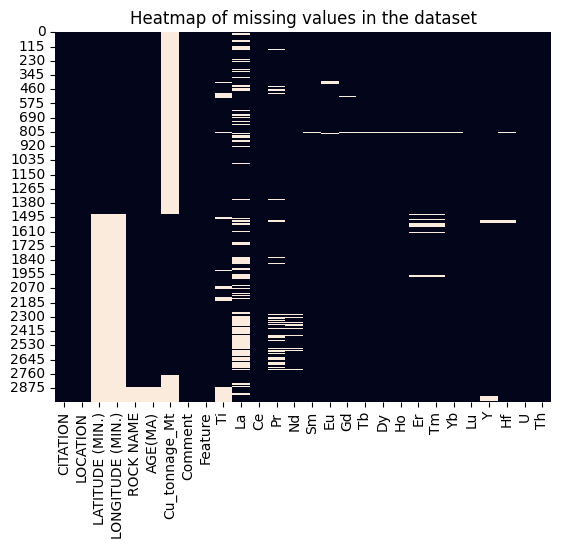

In [18]:
plt.title("Heatmap of missing values in the dataset")
sns.heatmap(df1.isnull(), cbar=False)

### Renaming the columns for ease of working

In [19]:
df1.rename(columns = {'LOCATION': 'location', 
                      'LATITUDE (MIN.)':'latitude', 
                      'LONGITUDE (MIN.)':'longitude', 
                      'ROCK NAME':'rock_name', 
                      'AGE(MA)':'age_ma'}, inplace=True)

In [20]:
df1.columns

Index(['CITATION', 'location', 'latitude', 'longitude', 'rock_name', 'age_ma',
       'Cu_tonnage_Mt', 'Comment', 'Feature', 'Ti', 'La', 'Ce', 'Pr', 'Nd',
       'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf',
       'U', 'Th'],
      dtype='object')

In [21]:
### Checking the latitude column for null values

In [22]:
null_lat_rec = sqldf("""
                        SELECT location, COUNT(*)
                        FROM df1
                        WHERE latitude IS NULL
                        GROUP BY location

                     """)

In [23]:
null_lat_rec

,location,COUNT(*)
0,Aktogai,8
1,Baogutu,6
2,Batu Hijau,63
3,Bishop,19
4,Borly,5
5,Bozshakol,17
6,Chuquicamata,30
7,Chuquicamata-Rad,123
8,Dexing,48
9,El Abra,9


### Data Collection for missing latitude and longitude

In [24]:
coordinates_map = {
    'Aktogai':[46, 80],
    'Baogutu':[45, 84],
    'Batu Hijau':[-9, 117],
    'Bishop':[37, -118],
    'Borly':[48, -76],
    'Bozshakol':[51, 72],
    'Chuquicamata':[-22, -67],
    'Chuquicamata-Rad':[-22, -67],
    'Dexing':[28, 117],
    'El Abra':[-22, -68],
    'El Salvador':[-26, -70],
    'El Teniente':[-34, -70],
    'Erdenet':[49, 104],
    'Heruga':[43, 106],
    'Hugo Dummett':[43, 106],
    'Jiama':[35, 105],
    'Koksai':[44, 78],
    'Kounrad':[47, 75],
    'NChuquicamata-Rad':[-22, -67],
    'Nurkazghan':[50, 73],
    'Opache':[-22, -67],
    'Oyu Tolgoi':[43, 106],
    'Qulong':[30, 92],
    'Radomiro Tomic':[-22, -67],
    'Red Chris':[58, -130],
    'Sar Cheshmeh':[30, 56],
    'Shujiadian':[33, 110],
    'Sungun':[38, 46],
    'Tampakan':[6, 125],
    'Tintaya':[-15, -71],
    'Tuwu-Yandong':[42, 93],
    'Yellowstone':[45, 111],
    'Younger Toba Tuff':[3, 99],
    'Yulong':[31, 98]
}

In [25]:
### Functions to fill missing latitude and longitude values

In [26]:
def set_latitude(location):
    return coordinates_map[location][0]

def set_longitude(location):
    return coordinates_map[location][1]

In [27]:
df1['location'] = df1['location'].apply(str.strip)

In [28]:
null_latitude_rec = df1[df1['latitude'].isnull()]
null_latitude_rec

,CITATION,location,latitude,longitude,rock_name,age_ma,Cu_tonnage_Mt,Comment,Feature,Ti,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
1466,Shen et al. 2015,Borly,NaN,NaN,Gr-1,316.0,0.6,Fertility,1,8.64,...,86.5,32.1,NaN,NaN,409.0,83.0,1049.0,9740.0,494.0,342.0
1467,Shen et al. 2015,Borly,NaN,NaN,Gr-2,316.0,0.6,Fertility,1,9.92,...,119.0,43.7,NaN,NaN,527.0,102.0,1408.0,9690.0,625.0,495.0
1468,Shen et al. 2015,Borly,NaN,NaN,Gr-6,316.0,0.6,Fertility,1,10.90,...,83.3,32.6,NaN,NaN,421.0,86.0,1061.0,9320.0,509.0,338.0
1469,Shen et al. 2015,Borly,NaN,NaN,Gr-9,316.0,0.6,Fertility,1,5.60,...,104.0,37.8,NaN,NaN,444.0,86.0,1292.0,9010.0,321.0,319.0
1470,Shen et al. 2015,Borly,NaN,NaN,Gr-10,316.0,0.6,Fertility,1,16.20,...,49.9,18.8,NaN,NaN,203.0,37.0,613.0,9550.0,181.0,123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2983,Ballard et al. (2002),Chuquicamata-Rad,NaN,NaN,NaN,NaN,NaN,Barren,0,NaN,...,40.9,14.6,65.3,14.9,137.0,24.8,448.0,8803.0,92.0,66.0
2984,Ballard et al. (2002),Chuquicamata-Rad,NaN,NaN,NaN,NaN,NaN,Barren,0,NaN,...,69.5,23.4,102.9,21.9,199.0,34.7,725.0,8854.0,100.0,90.0
2985,Ballard et al. (2002),Chuquicamata-Rad,NaN,NaN,NaN,NaN,NaN,Barren,0,NaN,...,69.2,22.9,99.7,21.2,191.0,33.0,693.0,8890.0,97.0,86.0
2986,Ballard et al. (2002),Chuquicamata-Rad,NaN,NaN,NaN,NaN,NaN,Barren,0,NaN,...,34.2,12.5,58.2,12.9,123.0,21.9,394.0,9032.0,82.0,55.0


### Invoking the functions to replace missing latitudes and longitudes

In [29]:
null_latitude_rec['latitude'] = null_latitude_rec['latitude'].fillna(null_latitude_rec['location']
                                                             .apply(set_latitude))

null_latitude_rec['longitude'] = null_latitude_rec['longitude'].fillna(null_latitude_rec['location']
                                                             .apply(set_longitude))

In [30]:
null_latitude_rec

,CITATION,location,latitude,longitude,rock_name,age_ma,Cu_tonnage_Mt,Comment,Feature,Ti,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
1466,Shen et al. 2015,Borly,48.0,-76.0,Gr-1,316.0,0.6,Fertility,1,8.64,...,86.5,32.1,NaN,NaN,409.0,83.0,1049.0,9740.0,494.0,342.0
1467,Shen et al. 2015,Borly,48.0,-76.0,Gr-2,316.0,0.6,Fertility,1,9.92,...,119.0,43.7,NaN,NaN,527.0,102.0,1408.0,9690.0,625.0,495.0
1468,Shen et al. 2015,Borly,48.0,-76.0,Gr-6,316.0,0.6,Fertility,1,10.90,...,83.3,32.6,NaN,NaN,421.0,86.0,1061.0,9320.0,509.0,338.0
1469,Shen et al. 2015,Borly,48.0,-76.0,Gr-9,316.0,0.6,Fertility,1,5.60,...,104.0,37.8,NaN,NaN,444.0,86.0,1292.0,9010.0,321.0,319.0
1470,Shen et al. 2015,Borly,48.0,-76.0,Gr-10,316.0,0.6,Fertility,1,16.20,...,49.9,18.8,NaN,NaN,203.0,37.0,613.0,9550.0,181.0,123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2983,Ballard et al. (2002),Chuquicamata-Rad,-22.0,-67.0,NaN,NaN,NaN,Barren,0,NaN,...,40.9,14.6,65.3,14.9,137.0,24.8,448.0,8803.0,92.0,66.0
2984,Ballard et al. (2002),Chuquicamata-Rad,-22.0,-67.0,NaN,NaN,NaN,Barren,0,NaN,...,69.5,23.4,102.9,21.9,199.0,34.7,725.0,8854.0,100.0,90.0
2985,Ballard et al. (2002),Chuquicamata-Rad,-22.0,-67.0,NaN,NaN,NaN,Barren,0,NaN,...,69.2,22.9,99.7,21.2,191.0,33.0,693.0,8890.0,97.0,86.0
2986,Ballard et al. (2002),Chuquicamata-Rad,-22.0,-67.0,NaN,NaN,NaN,Barren,0,NaN,...,34.2,12.5,58.2,12.9,123.0,21.9,394.0,9032.0,82.0,55.0


In [31]:
df1.loc[null_latitude_rec.index, 'latitude'] = null_latitude_rec['latitude']
df1.loc[null_latitude_rec.index, 'longitude'] = null_latitude_rec['longitude']

In [32]:
print('Latitude nulls: ', df1['latitude'].isna().sum())
print('Longitude nulls: ', df1['longitude'].isna().sum())

Latitude nulls:  0
Longitude nulls:  0


### Replace "Cu_Tonnage" for Barren ores with 0.0

In [33]:
df1.loc[df1['Comment'] == 'Barren', 'Cu_tonnage_Mt'] = 0.0

### Just the trace elements left for handling nulls

In [34]:
df1.isnull().sum().sort_values(ascending=False)

La               923
Pr               256
Ti               255
rock_name        124
age_ma           124
Nd                93
Er                79
Tm                78
Y                 74
Hf                25
Eu                15
Sm                 8
Gd                 6
Ce                 5
Dy                 3
Lu                 2
Yb                 1
Tb                 1
Ho                 1
U                  0
CITATION           0
location           0
Feature            0
Comment            0
Cu_tonnage_Mt      0
longitude          0
latitude           0
Th                 0
dtype: int64

### Mean Values of trace elements based on type of ore: Barren or Fertility

In [35]:
sqldf("""
            
          SELECT Comment, AVG(La), AVG(Pr), AVG(Ti), AVG(age_ma), AVG(Nd), AVG(Er), AVG(Tm), AVG(Y), AVG(Hf),
                          AVG(Eu), AVG(Sm), AVG(Gd), AVG(Ce), AVG(Dy), AVG(Lu), AVG(Yb), AVG(Tb), AVG(Ho)
          FROM df1
          GROUP BY Comment
        
      """)

,Comment,AVG(La),AVG(Pr),AVG(Ti),AVG(age_ma),AVG(Nd),AVG(Er),AVG(Tm),AVG(Y),AVG(Hf),AVG(Eu),AVG(Sm),AVG(Gd),AVG(Ce),AVG(Dy),AVG(Lu),AVG(Yb),AVG(Tb),AVG(Ho)
0,Barren,5.496975,2.803270,38.320030,556.602423,12.349263,320.348590,72.562911,2154.694014,11113.827390,1.481066,11.697207,47.258081,35.642595,213.756964,121.309176,649.943063,18.653674,74.816806
1,Fertility,0.234889,0.123007,6.714327,201.778094,1.367614,125.670413,30.266185,769.383452,8854.285237,1.016840,2.535607,15.371648,21.207080,54.388516,66.430931,325.240032,6.329784,29.417486


In [36]:
### Missing "rock_name" records belong to BARREN type.

In [37]:
sqldf("""
            
            SELECT Comment, COUNT(*) AS count
            FROM df1
            WHERE rock_name IS NULL
            GROUP BY Comment

      """)

,Comment,count
0,Barren,124


In [38]:
df1.loc[df1['Comment'] == 'Barren'].head(2)

,CITATION,location,latitude,longitude,rock_name,age_ma,Cu_tonnage_Mt,Comment,Feature,Ti,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
0,[19221] ZHAO SHAO-QING (2015),CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...,33.0,95.0,DACITE,222.0,0.0,Barren,0,7.88,...,295.0,125.0,526.0,129.0,1077.0,199.0,2737.0,12390.0,305.0,134.0
1,[19221] ZHAO SHAO-QING (2015),CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...,33.0,95.0,DACITE,222.0,0.0,Barren,0,10.90,...,361.0,147.0,611.0,148.0,1232.0,228.0,3226.0,12591.0,503.0,272.0


In [39]:
# Notice that a few of the Barren ores contain rock_name. A good approach is to fill the missing values with mode.
# In Addition, there is a category by the name "NOT GIVEN". We can even choose to replace nulls with it.

In [40]:
df1.loc[df1['Comment'] == 'Barren']['rock_name'].value_counts()

GRANITE              524
NOT GIVEN            214
GRANITE, RAPAKIVI    168
ANDESITE             107
GNEISS                88
                    ... 
RC13-78_56             1
RC13-78_34             1
RC13-78_33             1
RC13-78_31             1
TTZ1-58                1
Name: rock_name, Length: 115, dtype: int64

In [41]:
### All missing rock_name records belong to one location: "Chuquicamata-Rad"

In [42]:
df1.loc[df1['rock_name'].isnull()][['Comment', 'rock_name', 'age_ma', 'location']]

,Comment,rock_name,age_ma,location
2864,Barren,NaN,NaN,NChuquicamata-Rad
2865,Barren,NaN,NaN,Chuquicamata-Rad
2866,Barren,NaN,NaN,Chuquicamata-Rad
2867,Barren,NaN,NaN,Chuquicamata-Rad
2868,Barren,NaN,NaN,Chuquicamata-Rad
...,...,...,...,...
2983,Barren,NaN,NaN,Chuquicamata-Rad
2984,Barren,NaN,NaN,Chuquicamata-Rad
2985,Barren,NaN,NaN,Chuquicamata-Rad
2986,Barren,NaN,NaN,Chuquicamata-Rad


In [43]:
sqldf("""
            SELECT location, age_ma, Comment, rock_name, latitude, longitude
            FROM df1
            WHERE location = 'Chuquicamata'
            
     """)

,location,age_ma,Comment,rock_name,latitude,longitude
0,Chuquicamata,35.0,Fertility,610-01,-22.0,-67.0
1,Chuquicamata,35.0,Fertility,610-02,-22.0,-67.0
2,Chuquicamata,35.0,Fertility,610-03,-22.0,-67.0
3,Chuquicamata,35.0,Fertility,610-04,-22.0,-67.0
4,Chuquicamata,35.0,Fertility,610-05,-22.0,-67.0
5,Chuquicamata,35.0,Fertility,610-06,-22.0,-67.0
6,Chuquicamata,35.0,Fertility,610-07,-22.0,-67.0
7,Chuquicamata,35.0,Fertility,610-08,-22.0,-67.0
8,Chuquicamata,35.0,Fertility,610-09,-22.0,-67.0
9,Chuquicamata,35.0,Fertility,610-10,-22.0,-67.0


In [44]:
df1.loc[df1['location'] == 'NChuquicamata-Rad', 'location'] = 'Chuquicamata-Rad'

In [45]:
df1['location'].value_counts()

Hugo Dummett                                                                                                          252
Heruga                                                                                                                208
BALTIC SHIELD - PROTEROZOIC / SVECOFENNIAN PROVINCE / FINLAND / WIBORG RAPAKIVI GRANITE BATHOLITH                     168
CENTRAL ASIAN FOLDBELT - CENOZOIC/QUATERNARY / CHINA - CENOZOIC/QUATERNARY / TIBET                                    150
CENTRAL ASIAN FOLDBELT - PALEOZOIC / CHINA - PALEOZOIC / GUANGXI PROVINCE / DARONGSHAN BATHOLITH - JIUZHOU COMPLEX    144
                                                                                                                     ... 
Aktogai                                                                                                                 8
Erdenet                                                                                                                 8
Baogutu                 

In [46]:
### Age_ma missing values

In [47]:
null_age = sqldf("""
                      SELECT location, Comment  
                      FROM df1
                      WHERE age_ma IS NULL
                  """)

In [48]:
null_age['Comment'].value_counts()

Barren    124
Name: Comment, dtype: int64

In [49]:
null_age

,location,Comment
0,Chuquicamata-Rad,Barren
1,Chuquicamata-Rad,Barren
2,Chuquicamata-Rad,Barren
3,Chuquicamata-Rad,Barren
4,Chuquicamata-Rad,Barren
...,...,...
119,Chuquicamata-Rad,Barren
120,Chuquicamata-Rad,Barren
121,Chuquicamata-Rad,Barren
122,Chuquicamata-Rad,Barren


In [50]:
null_age['location'].value_counts()

Chuquicamata-Rad    124
Name: location, dtype: int64

In [51]:
df1['age_ma'].sample(20)

2952            NaN
1824       3.700000
1022     134.789871
1975     328.000000
1325     121.000000
1905       3.800000
1769      41.000000
2351     370.000000
2704     370.000000
1243    3644.000000
1157     827.000000
838     1658.382594
1361     124.000000
647      237.000000
884     1624.762561
2880            NaN
2119     372.000000
759     1431.000000
564       60.900000
1953      16.000000
Name: age_ma, dtype: float64

### Plotting the Distributions

<Axes: xlabel='age_ma', ylabel='Density'>

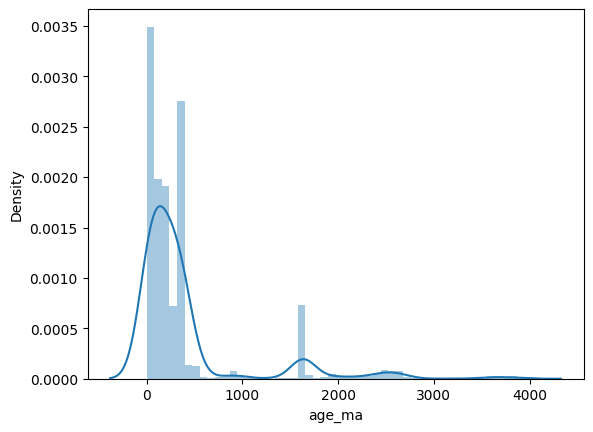

In [52]:
import seaborn as sns
sns.distplot(df1['age_ma'])

In [53]:
barren_age = sqldf("""
                  SELECT age_ma, LOCATION  
                  FROM df1
                  WHERE Comment = 'Barren'

                  """)

In [54]:
barren_age

,age_ma,location
0,222.0,CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...
1,222.0,CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...
2,222.0,CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...
3,222.0,CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...
4,222.0,CENTRAL ASIAN FOLDBELT - MESOZOIC / CHINA - ME...
...,...,...
1682,NaN,Chuquicamata-Rad
1683,NaN,Chuquicamata-Rad
1684,NaN,Chuquicamata-Rad
1685,NaN,Chuquicamata-Rad


<Axes: xlabel='age_ma', ylabel='Density'>

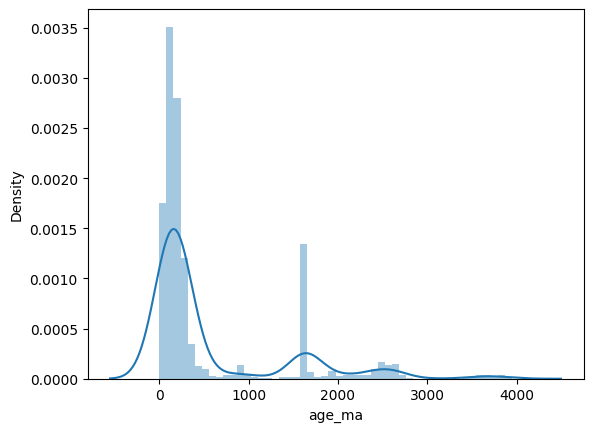

In [55]:
sns.distplot(barren_age['age_ma'])

In [56]:
print(barren_age['age_ma'].mean())

556.6024229734869


In [57]:
print(barren_age['age_ma'].median())

222.0


In [58]:
fertile_age = sqldf("""
                      SELECT age_ma, LOCATION  
                      FROM df1
                      WHERE Comment = 'Fertility'
                  """)

<Axes: xlabel='age_ma', ylabel='Density'>

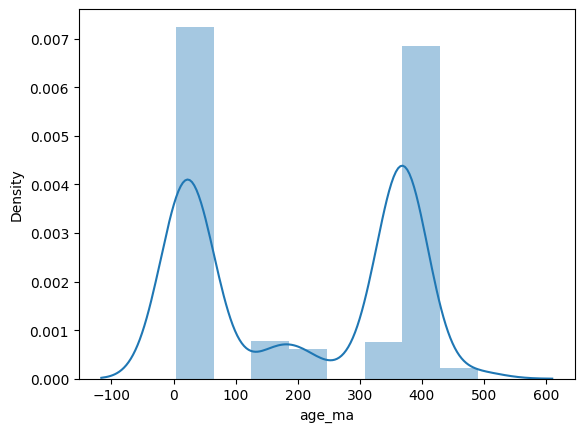

In [59]:
sns.distplot(fertile_age['age_ma'])

<Axes: xlabel='Hf', ylabel='Density'>

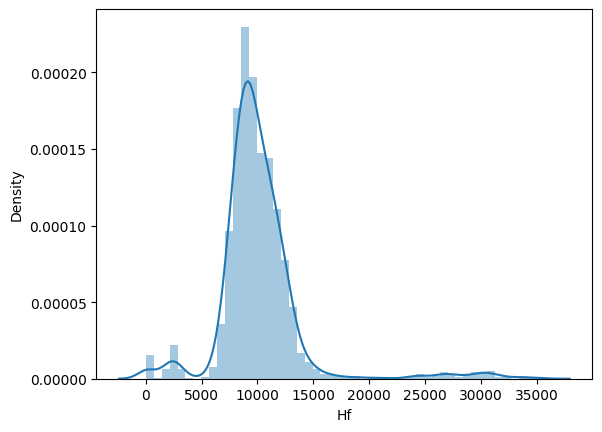

In [60]:
sns.distplot(df1['Hf'])

<Axes: >

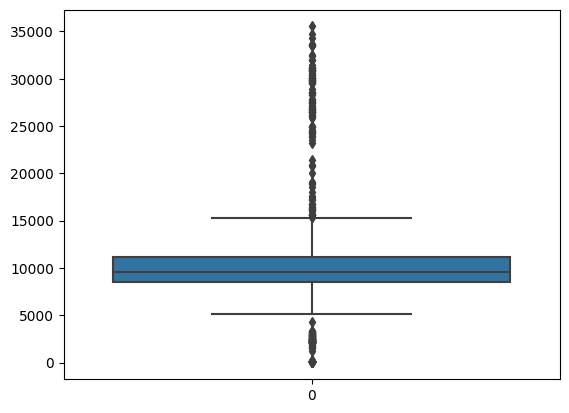

In [61]:
sns.boxplot(df1['Hf'])

In [62]:
df1.columns

Index(['CITATION', 'location', 'latitude', 'longitude', 'rock_name', 'age_ma',
       'Cu_tonnage_Mt', 'Comment', 'Feature', 'Ti', 'La', 'Ce', 'Pr', 'Nd',
       'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf',
       'U', 'Th'],
      dtype='object')

In [63]:
df1.drop(columns=['CITATION', 'rock_name'], inplace=True)

In [64]:
df1.columns

Index(['location', 'latitude', 'longitude', 'age_ma', 'Cu_tonnage_Mt',
       'Comment', 'Feature', 'Ti', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd',
       'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th'],
      dtype='object')

In [65]:
df1.isnull().sum().sort_values(ascending=False)

La               923
Pr               256
Ti               255
age_ma           124
Nd                93
Er                79
Tm                78
Y                 74
Hf                25
Eu                15
Sm                 8
Gd                 6
Ce                 5
Dy                 3
Lu                 2
Yb                 1
Tb                 1
Ho                 1
U                  0
location           0
latitude           0
Feature            0
Comment            0
Cu_tonnage_Mt      0
longitude          0
Th                 0
dtype: int64

In [66]:
def replace_nulls(df, features):
    for feature in features:
        barren_median = df1[df1['Comment'] == 'Barren'][feature].median()
        fertile_median = df1[df1['Comment'] == 'Fertility'][feature].median()

        print(feature, barren_median, fertile_median)
        
        print(df[feature])
        df[feature] = df[feature].fillna(df.apply(lambda row: barren_median 
                                                  if row['Comment'] == 'Barren' else fertile_median, axis=1))
                                     
    return df

In [67]:
features = ['Ti', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy',
            'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th']

In [68]:
df1_copy = df1.copy()

In [69]:
df1_copy[['Ti', 'La', 'Ce', 'Pr']]

,Ti,La,Ce,Pr
0,7.88,0.050,10.5,0.050
1,10.90,69.100,169.0,22.500
2,6.00,0.020,25.1,0.300
3,9.06,0.280,12.0,NaN
4,4.93,0.070,16.5,0.150
...,...,...,...,...
2983,NaN,0.007,8.0,0.051
2984,NaN,0.013,9.0,0.137
2985,NaN,0.015,9.0,0.172
2986,NaN,0.002,8.0,0.039


In [70]:
df1_copy = replace_nulls(df1_copy, features)

Ti 9.728431202 5.55
0        7.88
1       10.90
2        6.00
3        9.06
4        4.93
        ...  
2983      NaN
2984      NaN
2985      NaN
2986      NaN
2987      NaN
Name: Ti, Length: 2988, dtype: float64
La 0.190204577 0.0395872595
0        0.050
1       69.100
2        0.020
3        0.280
4        0.070
         ...  
2983     0.007
2984     0.013
2985     0.015
2986     0.002
2987     0.056
Name: La, Length: 2988, dtype: float64
Ce 16.472930945 13.01863289
0        10.5
1       169.0
2        25.1
3        12.0
4        16.5
        ...  
2983      8.0
2984      9.0
2985      9.0
2986      8.0
2987      8.0
Name: Ce, Length: 2988, dtype: float64
Pr 0.20350000000000001 0.0652387115
0        0.050
1       22.500
2        0.300
3          NaN
4        0.150
         ...  
2983     0.051
2984     0.137
2985     0.172
2986     0.039
2987     0.075
Name: Pr, Length: 2988, dtype: float64
Nd 2.56 0.7761290240000001
0         4.25
1       132.00
2         4.41
3         1.88
4      

In [71]:
df1_copy[['Ti', 'La', 'Ce', 'Pr']]

,Ti,La,Ce,Pr
0,7.880000,0.050,10.5,0.0500
1,10.900000,69.100,169.0,22.5000
2,6.000000,0.020,25.1,0.3000
3,9.060000,0.280,12.0,0.2035
4,4.930000,0.070,16.5,0.1500
...,...,...,...,...
2983,9.728431,0.007,8.0,0.0510
2984,9.728431,0.013,9.0,0.1370
2985,9.728431,0.015,9.0,0.1720
2986,9.728431,0.002,8.0,0.0390


In [72]:
df1_copy.isnull().sum()

location           0
latitude           0
longitude          0
age_ma           124
Cu_tonnage_Mt      0
Comment            0
Feature            0
Ti                 0
La                 0
Ce                 0
Pr                 0
Nd                 0
Sm                 0
Eu                 0
Gd                 0
Tb                 0
Dy                 0
Ho                 0
Er                 0
Tm                 0
Yb                 0
Lu                 0
Y                  0
Hf                 0
U                  0
Th                 0
dtype: int64

In [73]:
df1_copy.loc[df1_copy['age_ma'].isnull()]

,location,latitude,longitude,age_ma,Cu_tonnage_Mt,Comment,Feature,Ti,La,Ce,...,Dy,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th
2864,Chuquicamata-Rad,-22.0,-67.0,NaN,0.0,Barren,0,9.728431,0.068,15.0,...,153.4,53.7,228.6,46.0,408.0,70.1,1609.0,8515.0,453.0,494.0
2865,Chuquicamata-Rad,-22.0,-67.0,NaN,0.0,Barren,0,9.728431,0.074,15.0,...,164.7,57.2,247.0,50.1,445.0,76.5,1735.0,8836.0,445.0,493.0
2866,Chuquicamata-Rad,-22.0,-67.0,NaN,0.0,Barren,0,9.728431,0.036,21.0,...,153.4,52.1,222.6,46.2,412.0,69.7,1563.0,10070.0,544.0,533.0
2867,Chuquicamata-Rad,-22.0,-67.0,NaN,0.0,Barren,0,9.728431,0.062,20.0,...,153.9,51.9,222.0,45.8,412.0,69.1,1545.0,9855.0,506.0,498.0
2868,Chuquicamata-Rad,-22.0,-67.0,NaN,0.0,Barren,0,9.728431,0.003,15.0,...,92.0,32.7,142.6,30.9,286.0,49.5,988.0,10232.0,312.0,271.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2983,Chuquicamata-Rad,-22.0,-67.0,NaN,0.0,Barren,0,9.728431,0.007,8.0,...,40.9,14.6,65.3,14.9,137.0,24.8,448.0,8803.0,92.0,66.0
2984,Chuquicamata-Rad,-22.0,-67.0,NaN,0.0,Barren,0,9.728431,0.013,9.0,...,69.5,23.4,102.9,21.9,199.0,34.7,725.0,8854.0,100.0,90.0
2985,Chuquicamata-Rad,-22.0,-67.0,NaN,0.0,Barren,0,9.728431,0.015,9.0,...,69.2,22.9,99.7,21.2,191.0,33.0,693.0,8890.0,97.0,86.0
2986,Chuquicamata-Rad,-22.0,-67.0,NaN,0.0,Barren,0,9.728431,0.002,8.0,...,34.2,12.5,58.2,12.9,123.0,21.9,394.0,9032.0,82.0,55.0


In [74]:
df1_copy.loc[df1_copy['location'] == 'Chuquicamata-Rad', 'age_ma'] = 35.0

In [75]:
df1_copy.isna().sum()

location         0
latitude         0
longitude        0
age_ma           0
Cu_tonnage_Mt    0
Comment          0
Feature          0
Ti               0
La               0
Ce               0
Pr               0
Nd               0
Sm               0
Eu               0
Gd               0
Tb               0
Dy               0
Ho               0
Er               0
Tm               0
Yb               0
Lu               0
Y                0
Hf               0
U                0
Th               0
dtype: int64

In [76]:
df1_copy['Feature'].value_counts()

0    1687
1    1301
Name: Feature, dtype: int64

### Handling Outliers

In [77]:
df1_copy.columns

Index(['location', 'latitude', 'longitude', 'age_ma', 'Cu_tonnage_Mt',
       'Comment', 'Feature', 'Ti', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd',
       'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th'],
      dtype='object')

In [78]:
features_with_outliers = ['age_ma', 'Cu_tonnage_Mt',
                           'Ti', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd',
                           'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th']

### Box-plot before handling outliers

age_ma float64


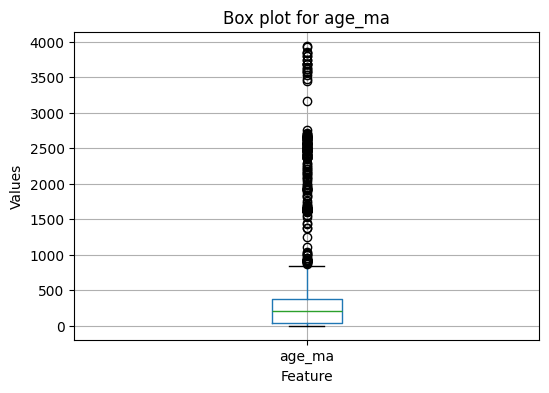

Cu_tonnage_Mt float64


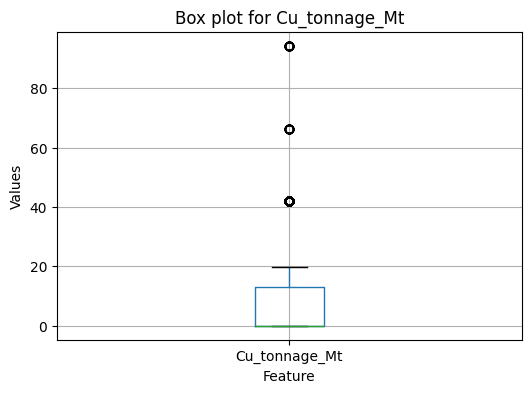

Ti float64


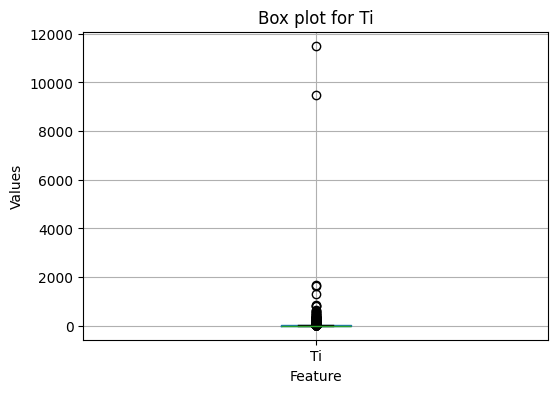

La float64


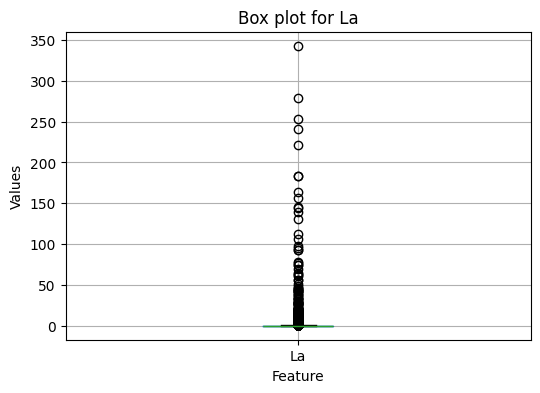

Ce float64


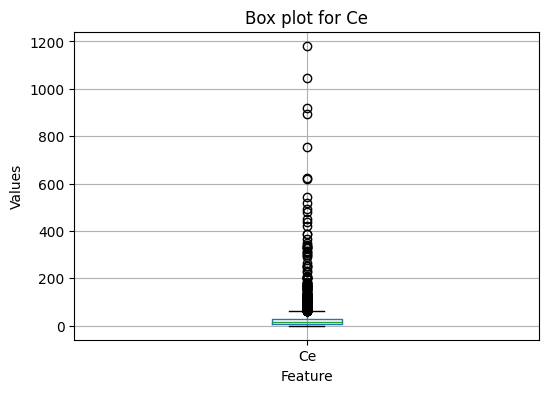

Pr float64


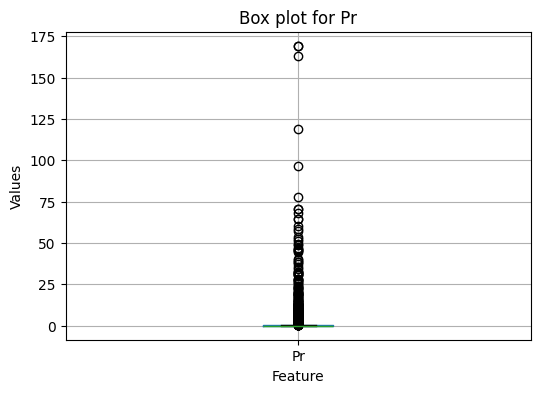

Nd float64


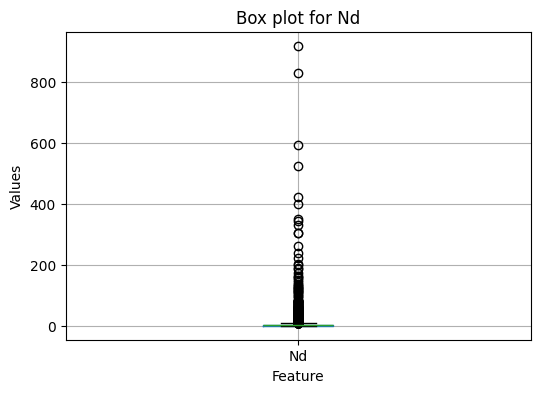

Sm float64


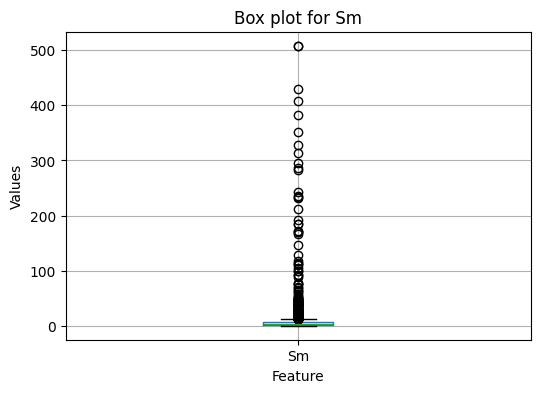

Eu float64


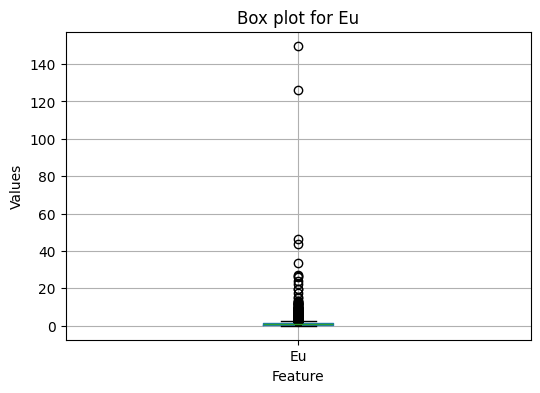

Gd float64


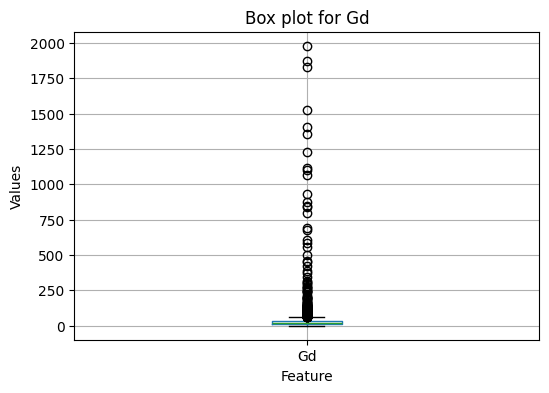

Tb float64


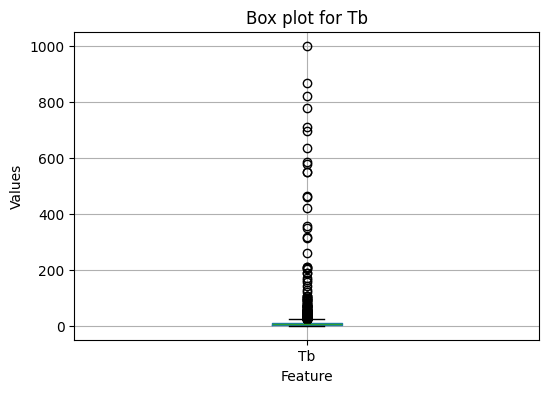

Dy float64


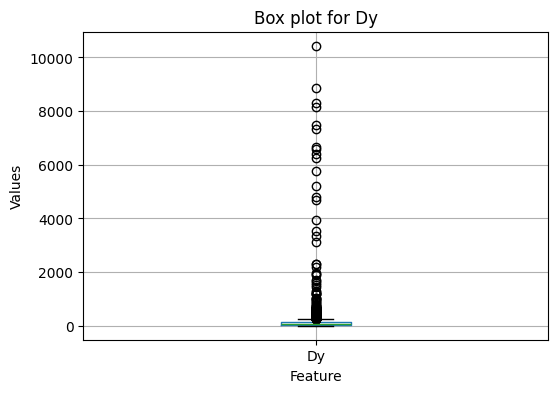

Ho float64


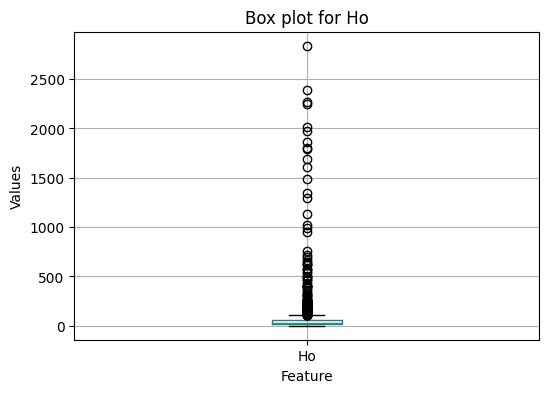

Er float64


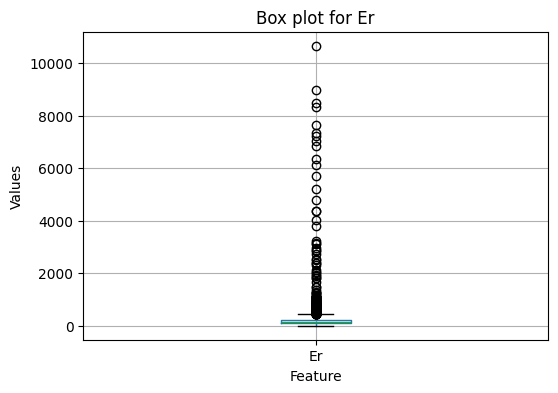

Tm float64


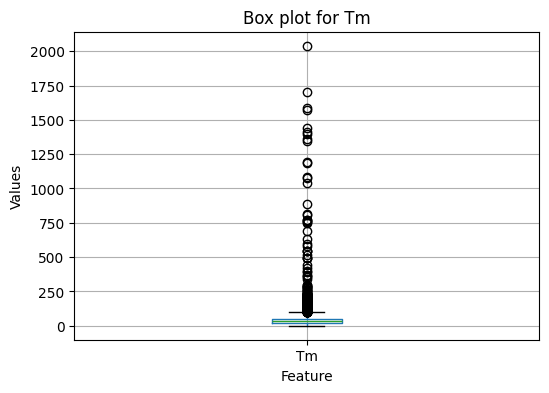

Yb float64


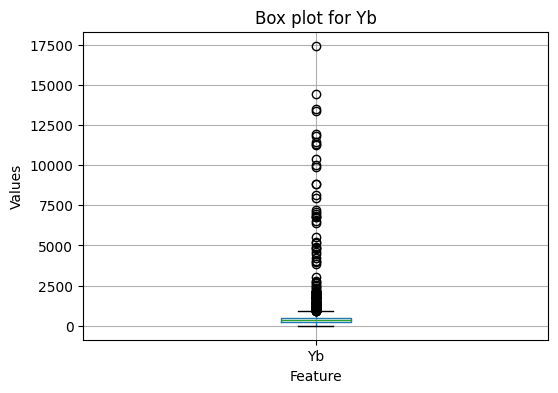

Lu float64


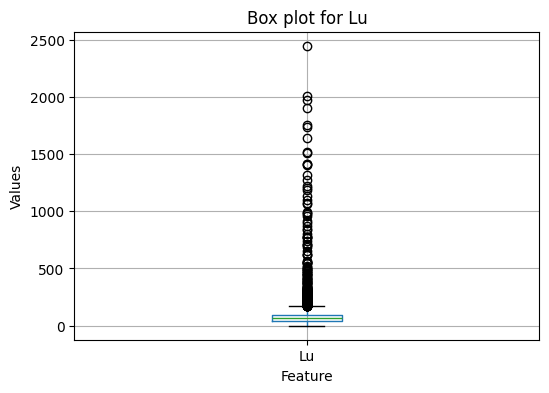

Y float64


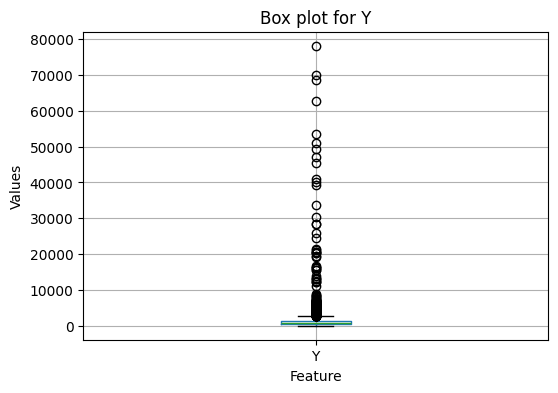

Hf float64


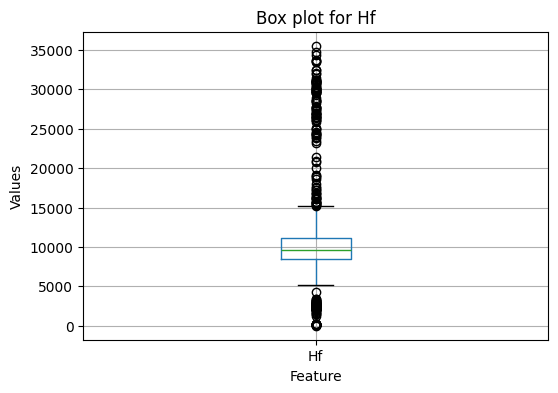

U float64


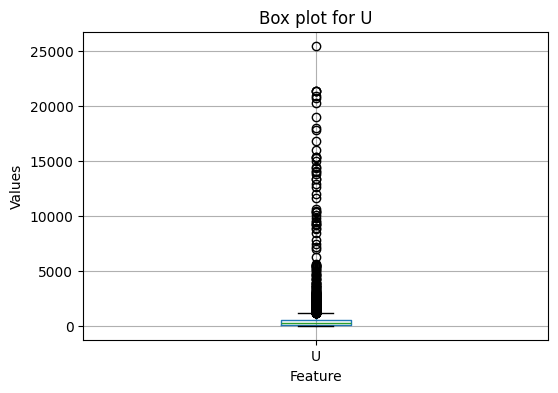

Th float64


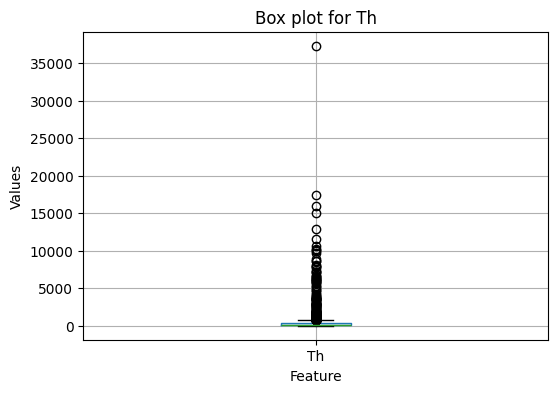

In [79]:
for feature in features_with_outliers:
    print(feature, df1_copy[feature].dtype)
    plt.figure(figsize=(6, 4))
    df1_copy[[feature]].boxplot()
    plt.title(f'Box plot for {feature}')
    plt.ylabel('Values')
    plt.xlabel('Feature')
    plt.show()

In [80]:
import pandas as pd

def replace_outliers(df):
    # Loop through each column
    for feature in features_with_outliers:
        # Check if the column contains numeric data (integer or float)
        if df[feature].dtype in ['int64', 'float64']:
            # Calculate the first and third quartiles
            q1 = df[feature].quantile(0.25)
            q3 = df[feature].quantile(0.75)
            
            # Calculate the interquartile range (IQR)
            iqr = q3 - q1
            
            # Define the lower and upper bounds for outliers
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            
            # Replace outliers with the maximum and minimum values of the column
            df[feature] = df[feature].apply(lambda x: max(x, lower_bound) if x < lower_bound 
                                            else min(x, upper_bound) if x > upper_bound 
                                            else x)
    
    return df

In [81]:
df1_copy = replace_outliers(df1_copy)

### Box-plots after handling outliers

age_ma float64


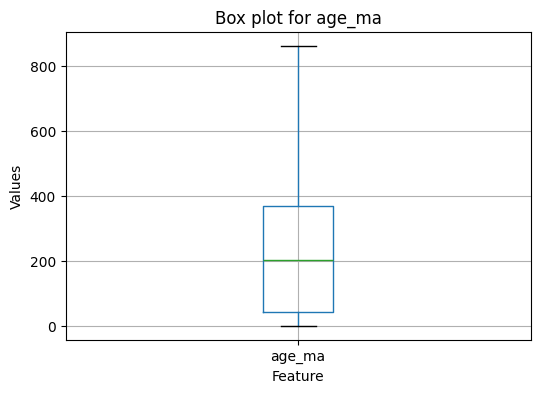

Cu_tonnage_Mt float64


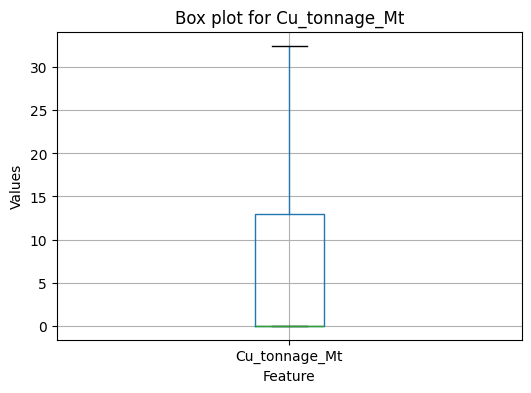

Ti float64


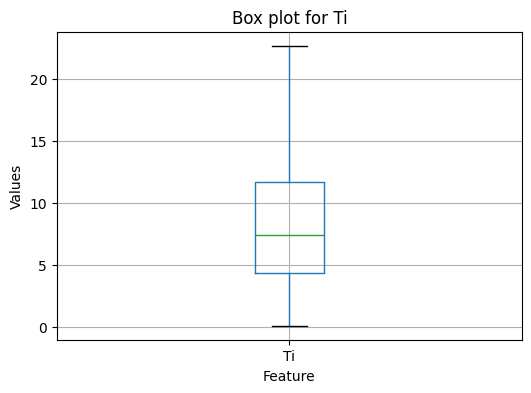

La float64


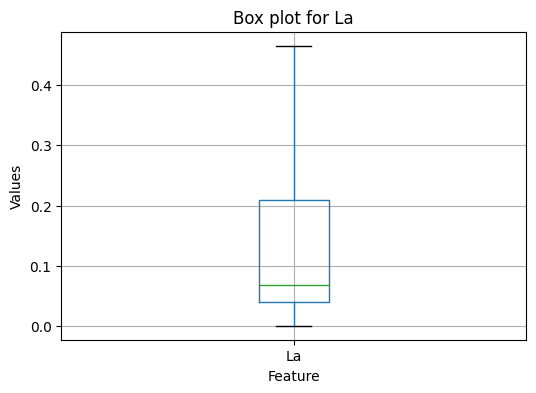

Ce float64


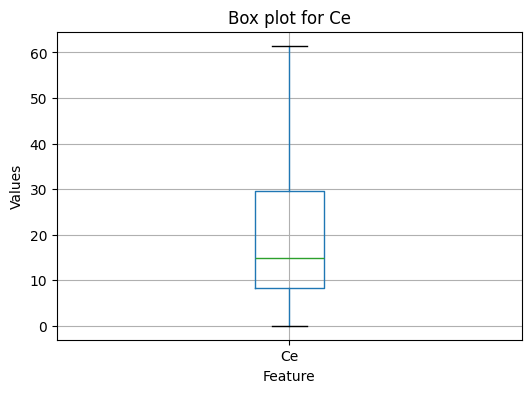

Pr float64


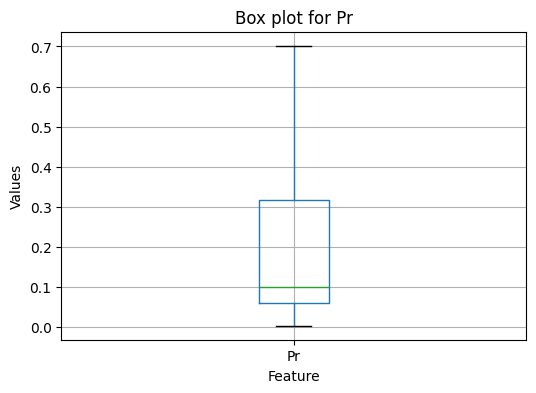

Nd float64


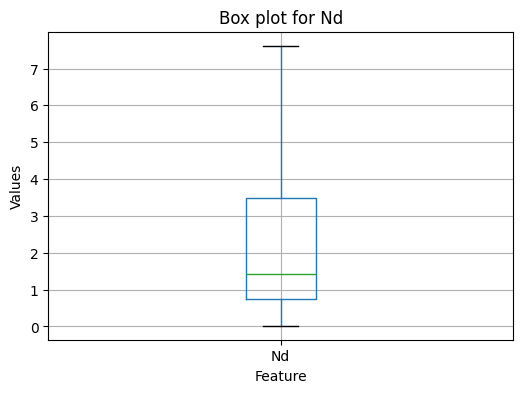

Sm float64


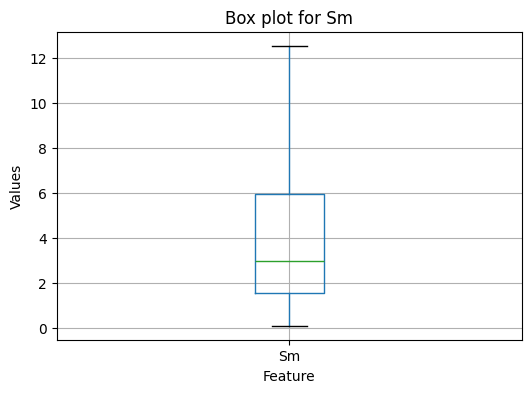

Eu float64


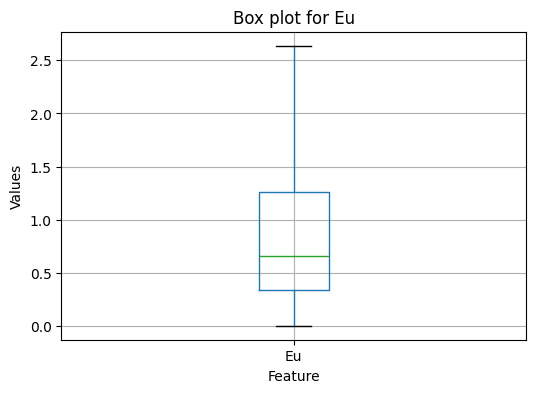

Gd float64


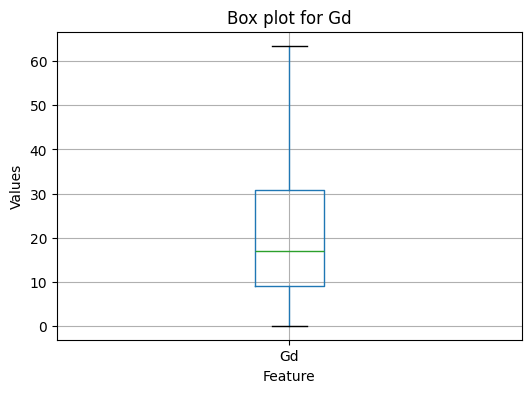

Tb float64


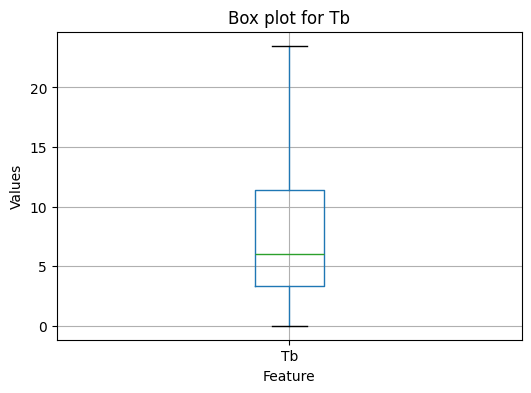

Dy float64


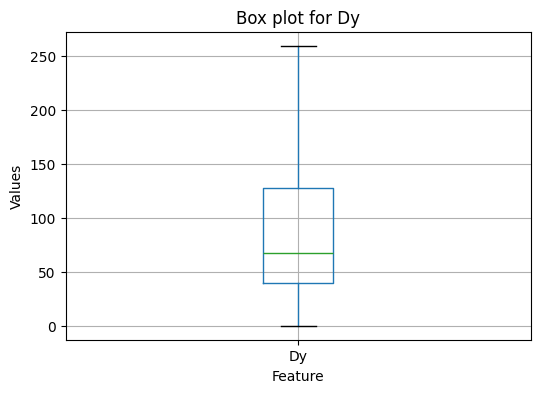

Ho float64


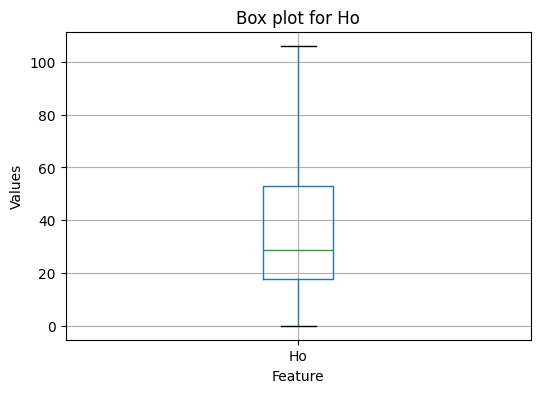

Er float64


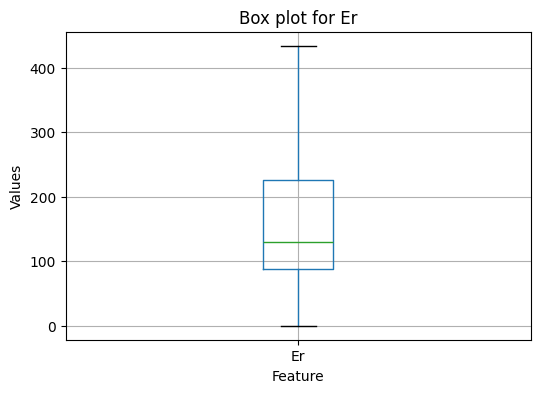

Tm float64


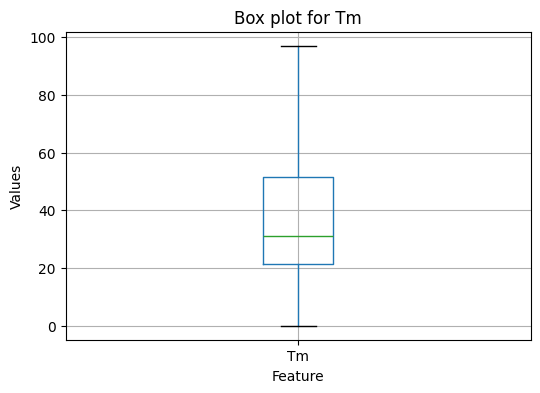

Yb float64


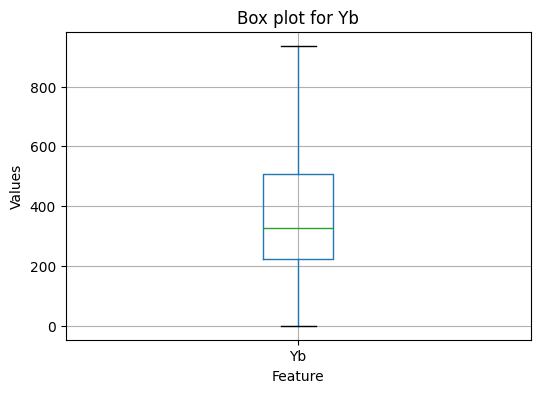

Lu float64


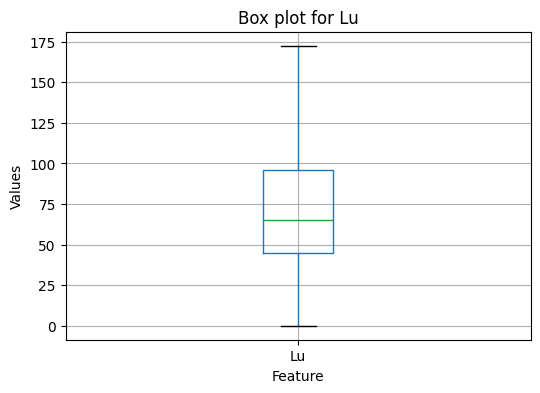

Y float64


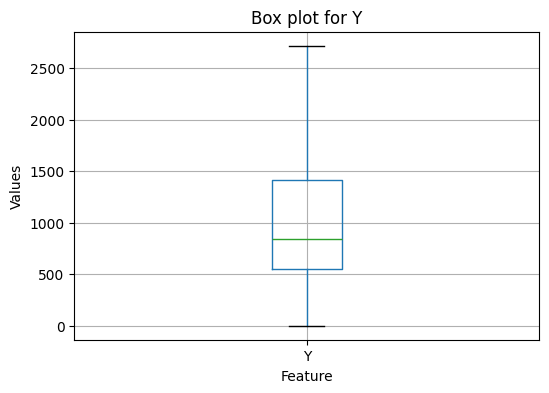

Hf float64


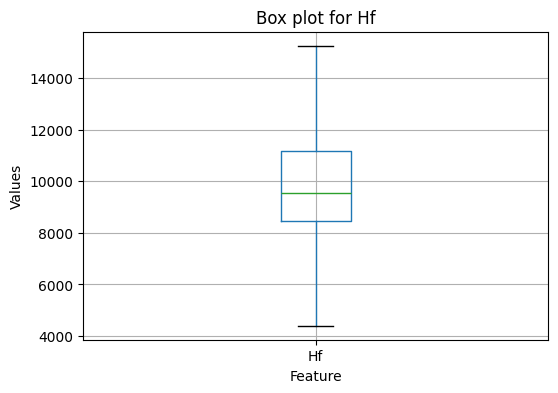

U float64


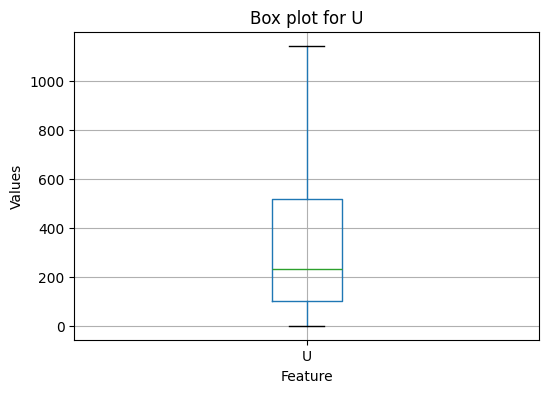

Th float64


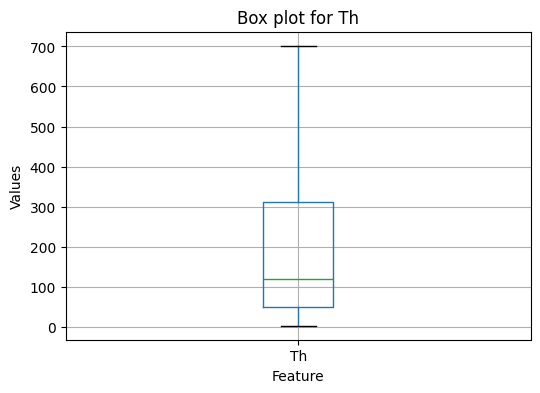

In [82]:
for feature in features_with_outliers:
    print(feature, df1_copy[feature].dtype)
    plt.figure(figsize=(6, 4))
    df1_copy[[feature]].boxplot()
    plt.title(f'Box plot for {feature}')
    plt.ylabel('Values')
    plt.xlabel('Feature')
    plt.show()

### Creating a new cluster ID column replacing latitude and longitude

In [83]:
df1_copy.columns

Index(['location', 'latitude', 'longitude', 'age_ma', 'Cu_tonnage_Mt',
       'Comment', 'Feature', 'Ti', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd',
       'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th'],
      dtype='object')

In [84]:
from sklearn.cluster import KMeans ,AgglomerativeClustering

# creates 5 clusters using hierarchical clustering.
agc = AgglomerativeClustering(n_clusters =5, 
                              affinity='euclidean', 
                              linkage='ward'
                             )

df1_copy['Agg Cluster ID'] = agc.fit_predict(df1_copy[['latitude','longitude']])

In [85]:
df1_copy['Agg Cluster ID'].value_counts()

0    1519
4     687
3     326
2     318
1     138
Name: Agg Cluster ID, dtype: int64

In [86]:
# creates 5 clusters using k-means clustering algorithm.
kmeans = KMeans(5)
# clusters = kmeans.fit_predict(df1_copy[['latitude','longitude']])
df1_copy['kmeans Cluster ID'] = kmeans.fit_predict(df1_copy[['latitude','longitude']])

In [87]:
df1_copy['kmeans Cluster ID'].value_counts()

2    1399
4     807
3     326
0     318
1     138
Name: kmeans Cluster ID, dtype: int64

### For time being let us consider Agg Cluster ID in our analysis. Replacing latitude and longitude

In [88]:
df1_copy.columns

Index(['location', 'latitude', 'longitude', 'age_ma', 'Cu_tonnage_Mt',
       'Comment', 'Feature', 'Ti', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd',
       'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th',
       'Agg Cluster ID', 'kmeans Cluster ID'],
      dtype='object')

### Scatter plot of clustered data points

Text(0, 0.5, 'Longitude')

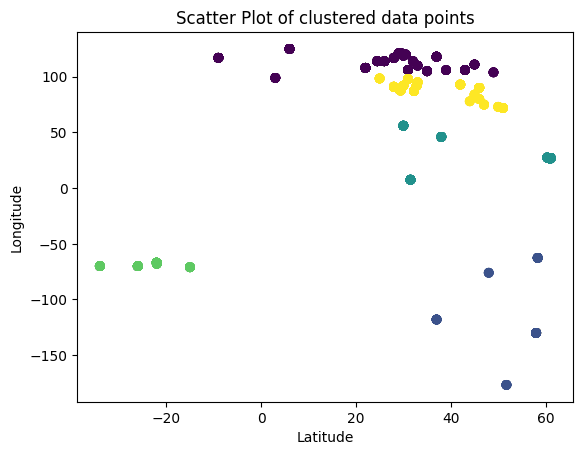

In [89]:
plt.title("Scatter Plot of clustered data points")
plt.scatter(df1_copy["latitude"], df1_copy["longitude"], c = df1_copy["Agg Cluster ID"], )
plt.xlabel("Latitude")
plt.ylabel("Longitude")

Text(0, 0.5, 'Longitude')

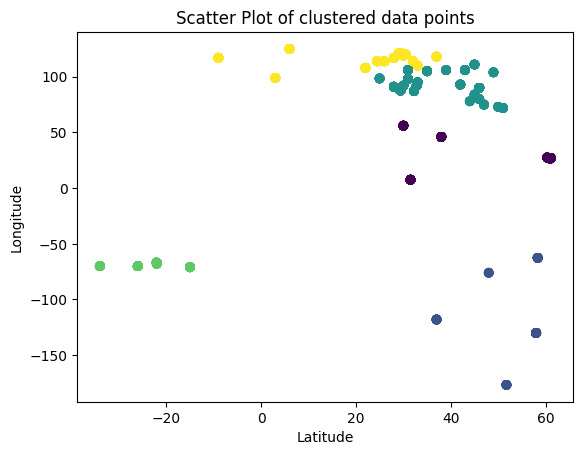

In [90]:
plt.title("Scatter Plot of clustered data points")
plt.scatter(df1_copy["latitude"], df1_copy["longitude"], c = df1_copy["kmeans Cluster ID"])
plt.xlabel("Latitude")
plt.ylabel("Longitude")

### Feature Correlation

In [91]:
df1_copy[['Ti', 'La', 'Ce', 'Pr']]

,Ti,La,Ce,Pr
0,7.880000,0.050000,10.500000,0.050000
1,10.900000,0.465619,61.474347,0.701901
2,6.000000,0.020000,25.100000,0.300000
3,9.060000,0.280000,12.000000,0.203500
4,4.930000,0.070000,16.500000,0.150000
...,...,...,...,...
2983,9.728431,0.007000,8.000000,0.051000
2984,9.728431,0.013000,9.000000,0.137000
2985,9.728431,0.015000,9.000000,0.172000
2986,9.728431,0.002000,8.000000,0.039000


In [92]:
df1_copy.corr()

,latitude,longitude,age_ma,Cu_tonnage_Mt,Feature,Ti,La,Ce,Pr,Nd,...,Er,Tm,Yb,Lu,Y,Hf,U,Th,Agg Cluster ID,kmeans Cluster ID
latitude,1.000000,0.341900,0.541450,0.025773,-0.084176,0.197352,0.200726,0.009641,0.136563,0.127091,...,0.096659,0.100411,0.127148,0.114898,0.018891,0.131859,0.019443,-0.034745,-0.193913,-0.509177
longitude,0.341900,1.000000,0.129995,0.068809,-0.017407,0.084927,0.058311,0.017456,0.024831,0.014805,...,0.124738,0.132506,0.146907,0.112475,0.114539,0.138751,0.013870,0.009997,-0.338624,0.318726
age_ma,0.541450,0.129995,1.000000,0.035986,-0.189150,0.282860,0.153818,-0.113116,0.123524,0.129515,...,-0.047033,-0.091560,-0.062043,-0.162321,-0.124102,0.103762,-0.172432,-0.250605,-0.252443,-0.349148
Cu_tonnage_Mt,0.025773,0.068809,0.035986,1.000000,0.746949,-0.193002,-0.418861,-0.200286,-0.373206,-0.394595,...,-0.279839,-0.244295,-0.172847,-0.178328,-0.302271,-0.349389,-0.339231,-0.320374,-0.290266,-0.117172
Feature,-0.084176,-0.017407,-0.189150,0.746949,1.000000,-0.364359,-0.493106,-0.100137,-0.459625,-0.470348,...,-0.374510,-0.354373,-0.278863,-0.222316,-0.396296,-0.372138,-0.214350,-0.191801,-0.115795,-0.103680
Ti,0.197352,0.084927,0.282860,-0.193002,-0.364359,1.000000,0.269233,0.070944,0.337971,0.392853,...,0.198621,0.160955,0.118126,0.038387,0.208006,0.105613,-0.130612,0.012400,0.007110,-0.009286
La,0.200726,0.058311,0.153818,-0.418861,-0.493106,0.269233,1.000000,0.421286,0.785139,0.641568,...,0.290230,0.331646,0.250523,0.277535,0.277522,0.194034,0.279735,0.285463,0.196360,-0.128665
Ce,0.009641,0.017456,-0.113116,-0.200286,-0.100137,0.070944,0.421286,1.000000,0.534270,0.579710,...,0.418184,0.374042,0.408330,0.391155,0.443391,0.192602,0.477974,0.726779,0.107567,0.017269
Pr,0.136563,0.024831,0.123524,-0.373206,-0.459625,0.337971,0.785139,0.534270,1.000000,0.902834,...,0.408552,0.435372,0.327310,0.359649,0.408595,0.100048,0.275851,0.392609,0.120858,-0.053669
Nd,0.127091,0.014805,0.129515,-0.394595,-0.470348,0.392853,0.641568,0.579710,0.902834,1.000000,...,0.529158,0.452574,0.431247,0.351950,0.539852,0.170102,0.286383,0.473528,0.079114,-0.012028


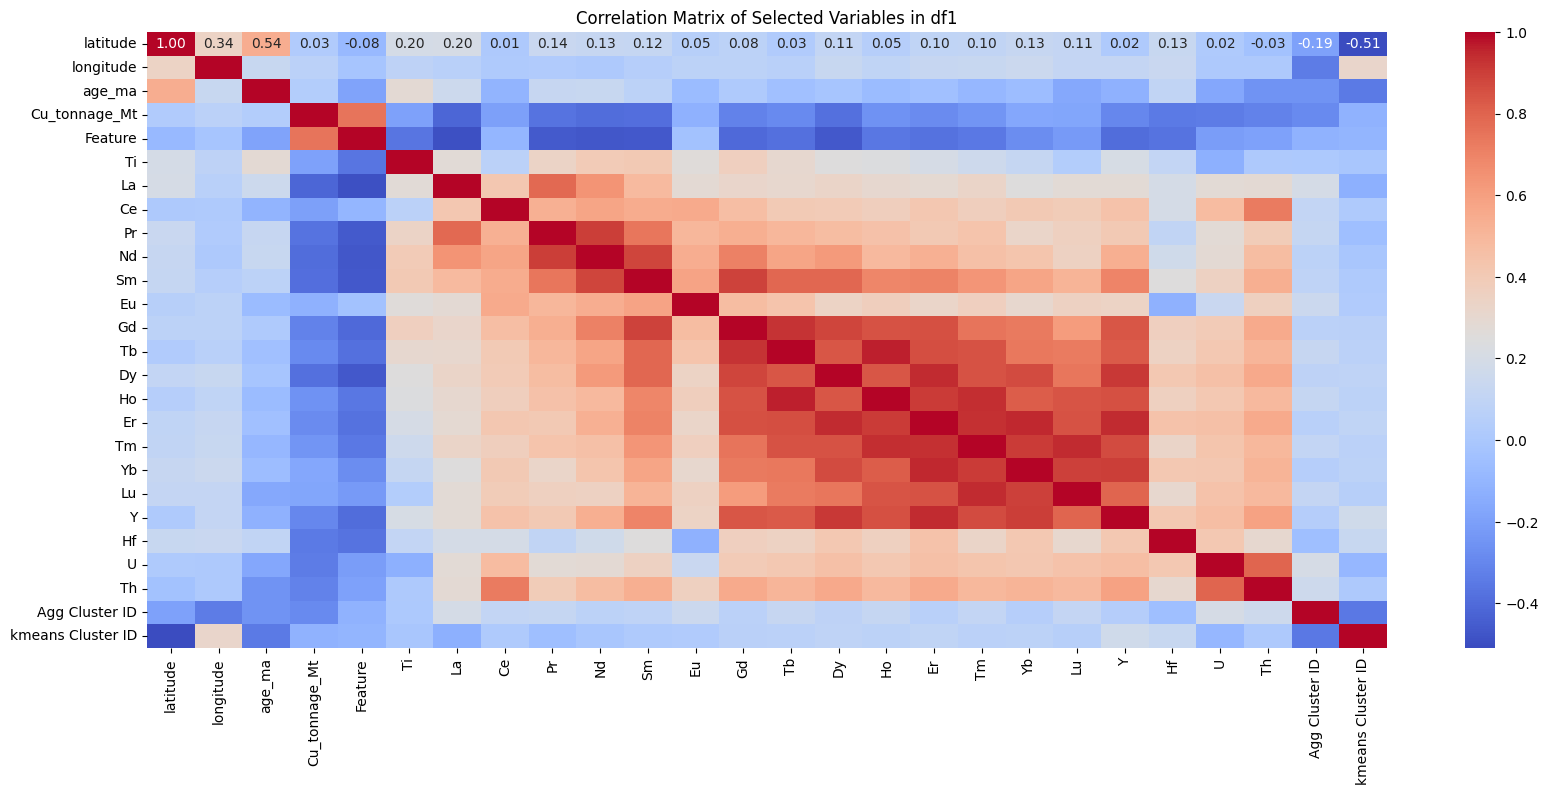

In [93]:
plt.figure(figsize=(20, 8))
corr = df1_copy.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Variables in df1')
plt.show()

### Sample ML Model testing

In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [113]:
df1_copy.columns

Index(['location', 'latitude', 'longitude', 'age_ma', 'Cu_tonnage_Mt',
       'Comment', 'Feature', 'Ti', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd',
       'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Hf', 'U', 'Th',
       'Agg Cluster ID', 'kmeans Cluster ID'],
      dtype='object')

In [114]:
X = df1_copy.drop(columns = ['location', 'Comment', 'Feature', 'latitude', 'longitude', 'kmeans Cluster ID'])
y = df1_copy['Feature']

In [115]:
X.head()

,age_ma,Cu_tonnage_Mt,Ti,La,Ce,Pr,Nd,Sm,Eu,Gd,...,Ho,Er,Tm,Yb,Lu,Y,Hf,U,Th,Agg Cluster ID
0,222.0,0.0,7.88,0.050000,10.500000,0.050000,4.250000,11.600000,1.990000,61.600000,...,106.1375,434.18329,97.083086,936.724661,172.530636,2716.955779,12390.0,305.0,134.0,4
1,222.0,0.0,10.90,0.465619,61.474347,0.701901,7.618805,12.540955,2.637494,63.498619,...,106.1375,434.18329,97.083086,936.724661,172.530636,2716.955779,12591.0,503.0,272.0,4
2,222.0,0.0,6.00,0.020000,25.100000,0.300000,4.410000,12.540955,2.300000,63.498619,...,106.1375,434.18329,97.083086,936.724661,172.530636,2716.955779,12724.0,639.0,414.0,4
3,222.0,0.0,9.06,0.280000,12.000000,0.203500,1.880000,5.080000,1.010000,33.800000,...,83.0000,356.00000,89.500000,762.000000,144.000000,1832.000000,12894.0,308.0,127.0,4
4,222.0,0.0,4.93,0.070000,16.500000,0.150000,2.320000,8.230000,1.520000,45.600000,...,106.1375,434.18329,97.083086,936.000000,171.000000,2355.000000,12535.0,348.0,155.0,4


In [116]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Feature, dtype: int64

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [118]:
type(X_train)

pandas.core.frame.DataFrame

In [119]:
y_train.shape

(2390,)

In [120]:
y_train.sum()

1049

### Perform scaling

In [121]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Logistic Regression Model

In [122]:
lr_model = LogisticRegression()

In [123]:
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [124]:
y_pred = lr_model.predict(X_test_scaled)

In [125]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [126]:
accuracy_score(y_test, y_pred)

0.9816053511705686

In [127]:
cm = confusion_matrix(y_test, y_pred)

In [128]:
cm

array([[340,   6],
       [  5, 247]])

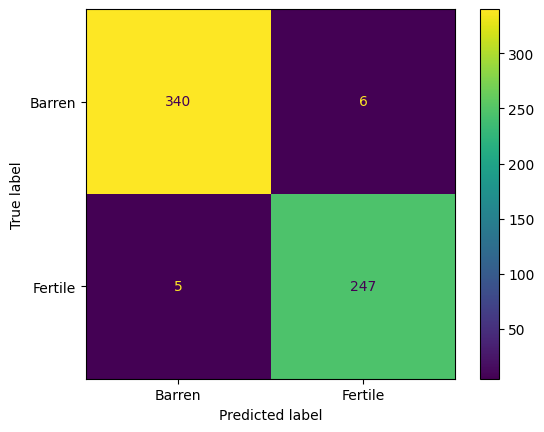

In [129]:
ConfusionMatrixDisplay(cm, display_labels=['Barren', 'Fertile']).plot()

In [130]:
target_names = ['Barren', 'Fertility']

report = classification_report(y_test, y_pred, target_names=target_names, digits=4)
print(report)

              precision    recall  f1-score   support

      Barren     0.9855    0.9827    0.9841       346
   Fertility     0.9763    0.9802    0.9782       252

    accuracy                         0.9816       598
   macro avg     0.9809    0.9814    0.9811       598
weighted avg     0.9816    0.9816    0.9816       598

